In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
povRate = pd.read_csv('../shared_data_read_only/Poverty Rate.csv',skipinitialspace = True)  
agEmploy = pd.read_csv('../shared_data_read_only/Agricultural Employment.csv')
agData = pd.read_csv('../shared_data_read_only/Agriculture Dataset.csv')
agData.drop(columns=['Unnamed: 0'], inplace = True)
dataDict = pd.read_excel('../shared_data_read_only/Copy of Data Dictionary.xlsx')
cropProd = pd.read_csv('../shared_data_read_only/Crop Production.csv')
expendLoans = pd.read_csv('../shared_data_read_only/Expenditure Loans and Investment into Agriculture.csv')
foodInsec = pd.read_csv('../shared_data_read_only/Food Insecurity.csv')

In [5]:
agData[agData['GDP  (2015 US$, mil)'].isna()]['Area']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
13618           OECD
13619           OECD
13620           OECD
13621           OECD
13622           OECD
Name: Area, Length: 3013, dtype: object

In [39]:
#area, Year, Population, Temperature
grouped_df = agData.groupby(by=['Area'])
for key, item in grouped_df:
    print(key)

Index(['Unnamed: 0', 'Area Code', 'Area', 'Year', 'Population',
       'Standard Deviation °C', 'Temperature change °C',
       'GDP  (2015 US$, mil)',
       'Farm-gate emissions - Emissions (CO2eq) (AR5) - kilotonnes',
       'Food Transport - Emissions (CO2eq) (AR5) - kilotonnes',
       'Waste - Emissions (CO2eq) (AR5) - kilotonnes',
       'Cereals excluding rice-Emissions (CO2eq)-kilotonnes',
       'Cereals excluding rice-Emissions intensity-kg CO2eq/kg product',
       'Cereals excluding rice-Production-tonnes',
       'Eggs, hen, in shell-Emissions (CO2eq)-kilotonnes',
       'Eggs, hen, in shell-Emissions intensity-kg CO2eq/kg product',
       'Eggs, hen, in shell-Production-tonnes',
       'Meat, buffalo-Emissions (CO2eq)-kilotonnes',
       'Meat, buffalo-Emissions intensity-kg CO2eq/kg product',
       'Meat, buffalo-Production-tonnes',
       'Meat, cattle-Emissions (CO2eq)-kilotonnes',
       'Meat, cattle-Emissions intensity-kg CO2eq/kg product',
       'Meat, cattle-Pr

In [6]:
CO2 = [col for col in agData.columns if ('CO2eq/kg') in col]
CO2

['Cereals excluding rice-Emissions intensity-kg CO2eq/kg product',
 'Eggs, hen, in shell-Emissions intensity-kg CO2eq/kg product',
 'Meat, buffalo-Emissions intensity-kg CO2eq/kg product',
 'Meat, cattle-Emissions intensity-kg CO2eq/kg product',
 'Meat, chicken-Emissions intensity-kg CO2eq/kg product',
 'Meat, goat-Emissions intensity-kg CO2eq/kg product',
 'Meat, pig-Emissions intensity-kg CO2eq/kg product',
 'Meat, sheep-Emissions intensity-kg CO2eq/kg product',
 'Milk, whole fresh buffalo-Emissions intensity-kg CO2eq/kg product',
 'Milk, whole fresh camel-Emissions intensity-kg CO2eq/kg product',
 'Milk, whole fresh cow-Emissions intensity-kg CO2eq/kg product',
 'Milk, whole fresh goat-Emissions intensity-kg CO2eq/kg product',
 'Milk, whole fresh sheep-Emissions intensity-kg CO2eq/kg product',
 'Rice, paddy-Emissions intensity-kg CO2eq/kg product']

In [7]:
grouped_df = agData.groupby(by=['Year'])

graphData = {key: None for key in CO2}
Cereals=[] 
Eggs_hen=[]
Meat_buffalo=[]
Meat_cattle=[]
Meat_chicken=[]
Meat_goat=[]
Meat_pig=[]
Meat_sheep=[]
Milk_whole_fresh_buffalo=[]
Milk_whole_fresh_camel=[]
Milk_whole_fresh_cow=[]
Milk_whole_fresh_goat=[]
Milk_whole_fresh_sheep=[]
Rice = []
TempMultiList = [ Cereals, Eggs_hen,Meat_buffalo,Meat_cattle,Meat_chicken,Meat_goat,Meat_pig,Meat_sheep,Milk_whole_fresh_buffalo,Milk_whole_fresh_camel,Milk_whole_fresh_cow,Milk_whole_fresh_goat,Milk_whole_fresh_sheep,Rice]
counter = 0
for i in CO2:
    for key, item in grouped_df:
        TempMultiList[counter].append([key,grouped_df.get_group(key)[CO2[counter]].sum()])
    graphData[i] = TempMultiList[counter]
    counter = counter+1
graphData

{'Cereals excluding rice-Emissions intensity-kg CO2eq/kg product': [[1961,
   308.17370000000005],
  [1962, 348.44899999999996],
  [1963, 443.93489999999997],
  [1964, 1799.4859000000001],
  [1965, 243.5327],
  [1966, 190.65340000000003],
  [1967, 172.5796],
  [1968, 187.0587],
  [1969, 181.16840000000002],
  [1970, 195.74089999999998],
  [1971, 217.80039999999997],
  [1972, 275.27919999999995],
  [1973, 246.7663],
  [1974, 225.62490000000003],
  [1975, 212.6209],
  [1976, 218.47809999999998],
  [1977, 383.12669999999997],
  [1978, 207.72549999999998],
  [1979, 212.11680000000004],
  [1980, 199.3563],
  [1981, 241.29889999999995],
  [1982, 264.7665],
  [1983, 274.7707],
  [1984, 219.2409],
  [1985, 218.1007],
  [1986, 274.1432],
  [1987, 296.9451],
  [1988, 156.4231],
  [1989, 216.7211],
  [1990, 142.9276],
  [1991, 204.6723],
  [1992, 217.4347],
  [1993, 236.92909999999998],
  [1994, 285.4983],
  [1995, 440.2412],
  [1996, 442.50419999999997],
  [1997, 569.336],
  [1998, 504.213400000

In [8]:
def makeAGraph(CO2Index):
    graph = pd.DataFrame(graphData[CO2[CO2Index]],columns=["Years",CO2[CO2Index]])
    graph= graph.set_index('Years')
    graph.plot()
    plt.show()

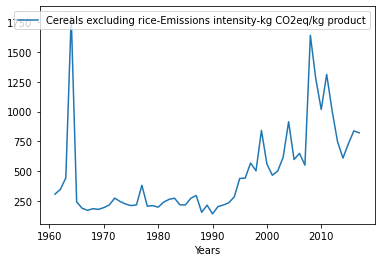

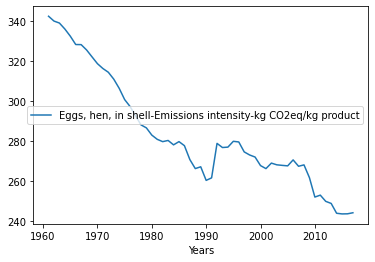

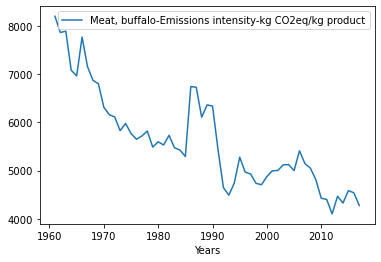

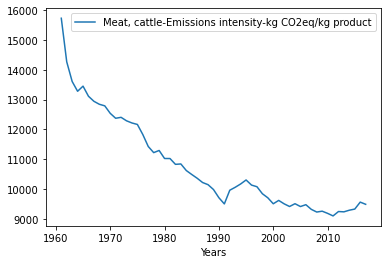

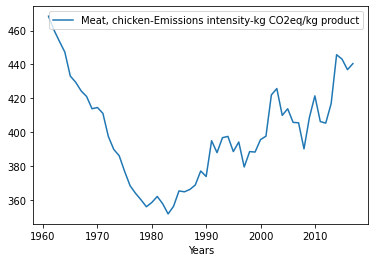

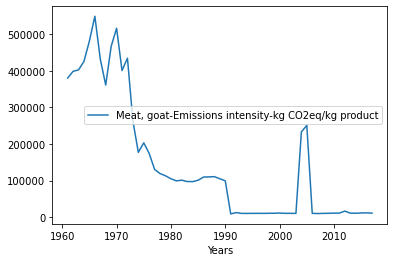

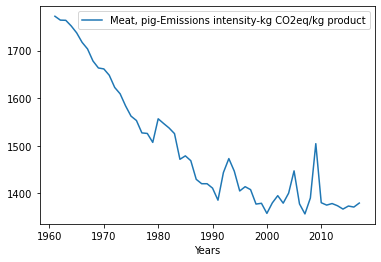

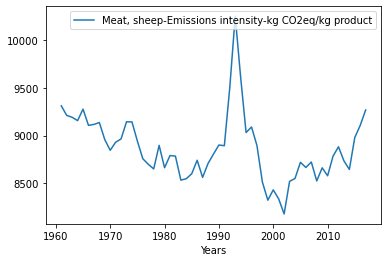

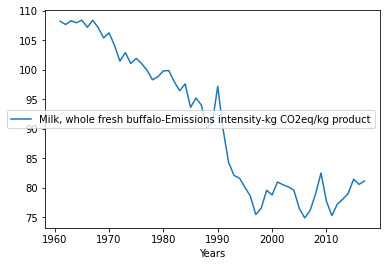

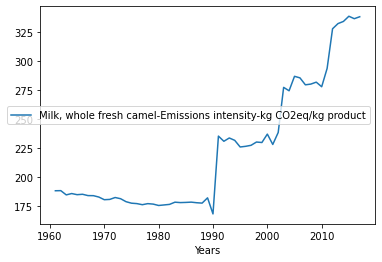

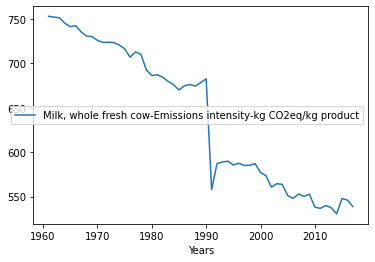

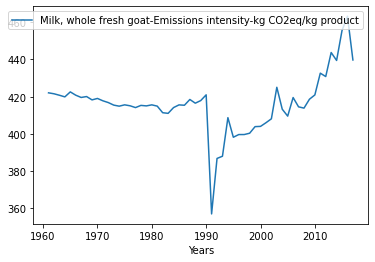

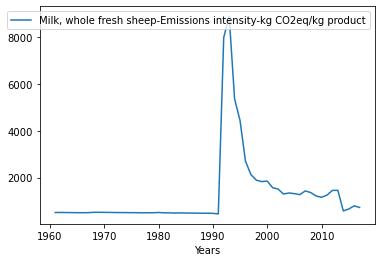

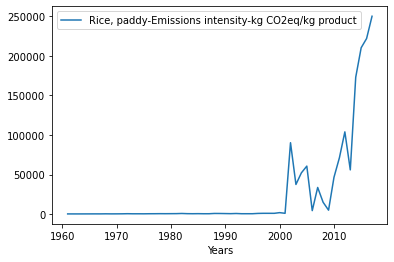

In [9]:
for i in range(len(CO2)):
    makeAGraph(i)

In [23]:
#top 3 and bottom 3 country on each graph
def graphLargest (Year, CO2Int):
    largest = agData[agData['Year']==Year].nlargest(3,CO2[CO2Int])
    p = sns.barplot(x="Area",y = CO2[CO2Int], data=largest )
    labels = CO2[CO2Int].split("-kg")
    p.set_title(label=''+str(Year) +': The Three Countries with the Largest\n'+ labels[0])
    p.set_ylabel(labels[1])
    p.set_xlabel("Countries")
#     plt.show()

In [21]:
def graphSmallest (Year, CO2Int):
    smallest = agData[agData['Year']==Year].nsmallest(3,CO2[CO2Int])
    p = sns.barplot(x="Area", y = CO2[CO2Int], data=smallest )
    labels = CO2[CO2Int].split("-kg")
    p.set_title(label=''+str(Year) +': The Three Countries with the Smallest\n'+ labels[0])
    p.set_ylabel(labels[1])
    p.set_xlabel("Countries")
#     plt.show()

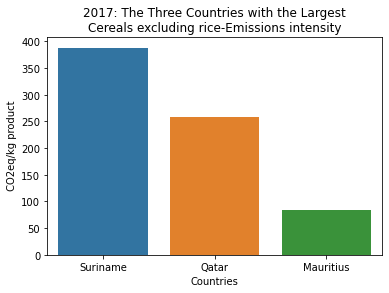

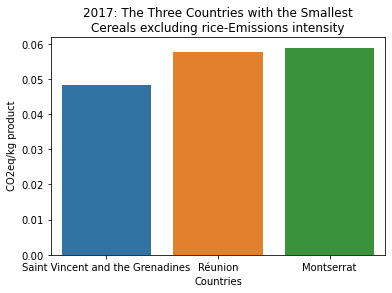

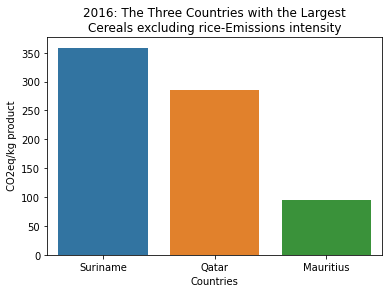

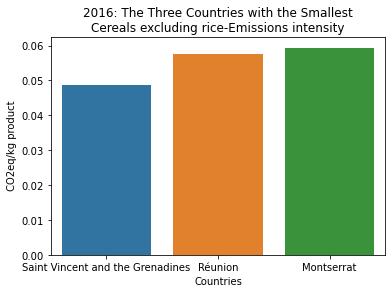

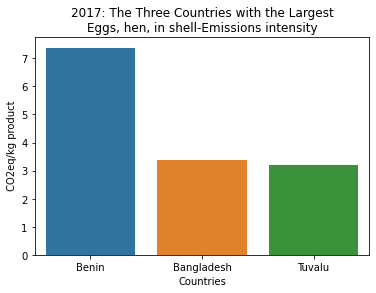

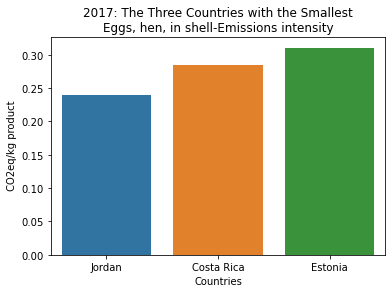

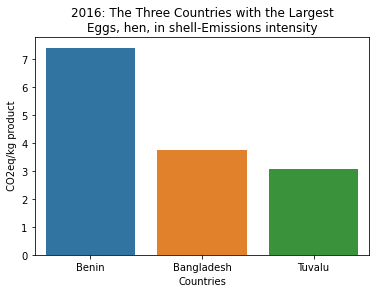

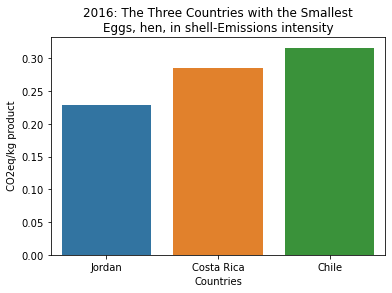

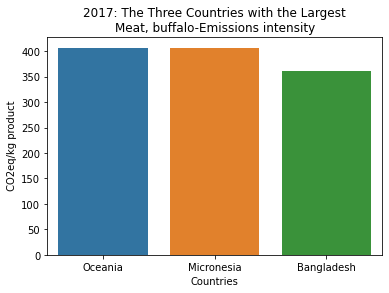

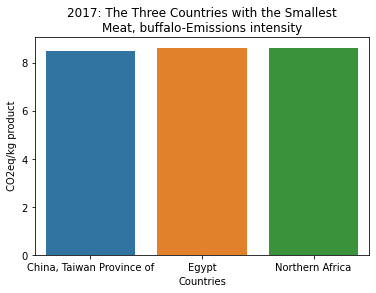

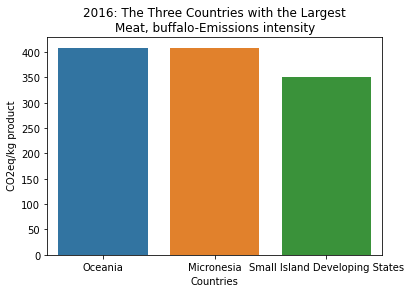

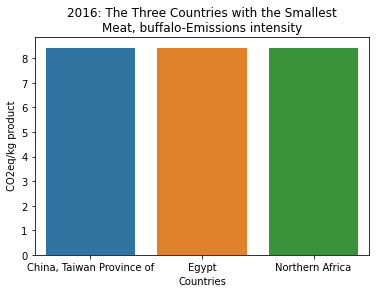

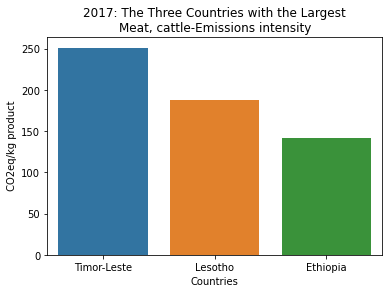

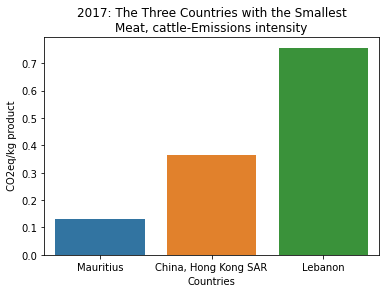

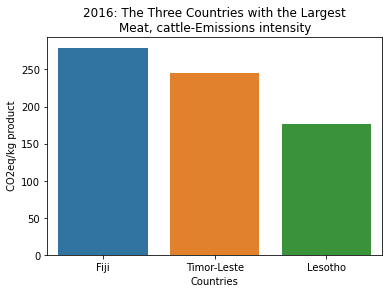

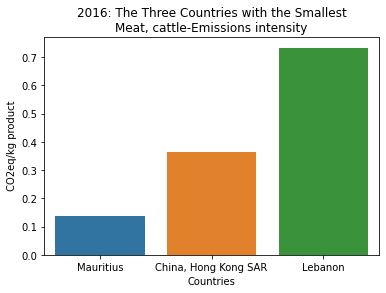

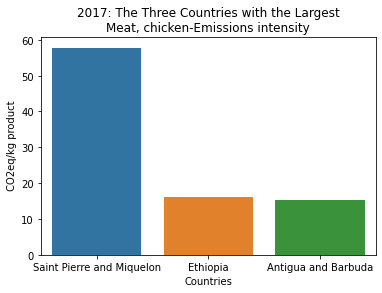

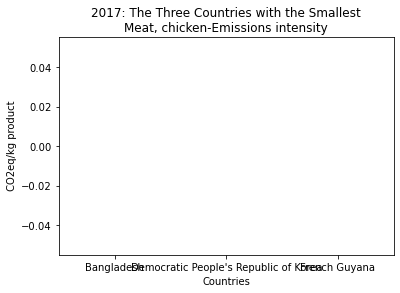

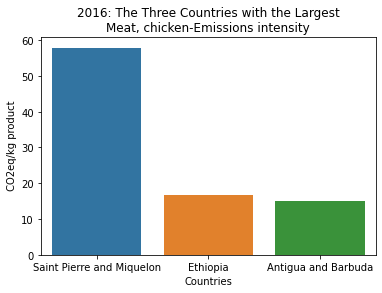

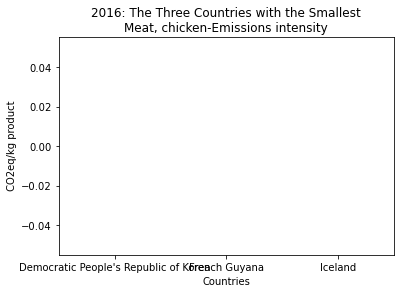

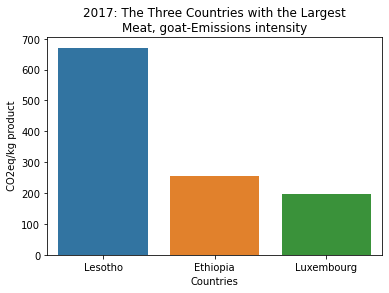

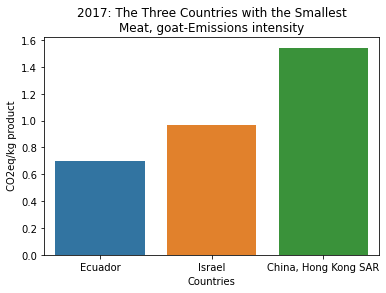

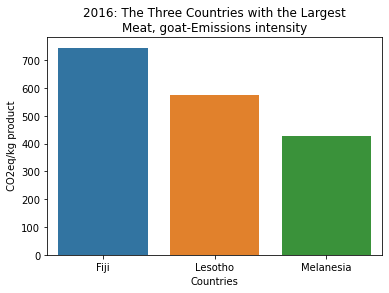

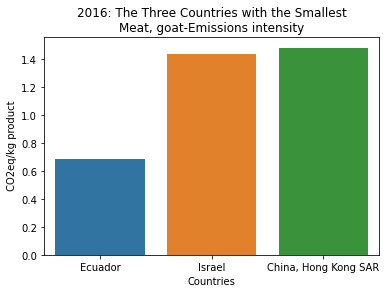

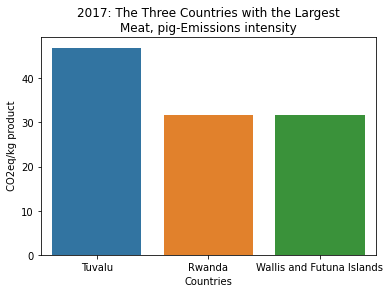

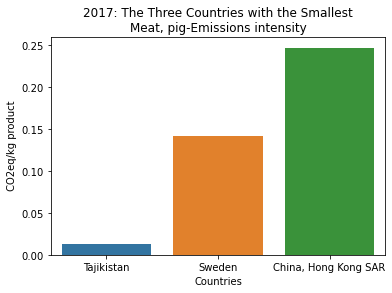

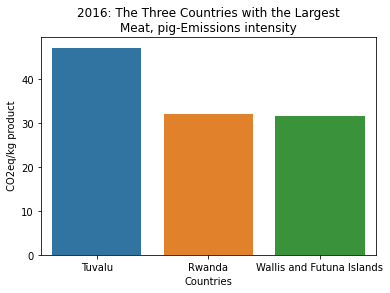

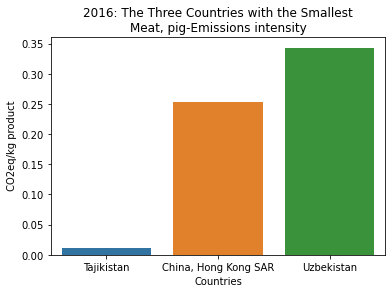

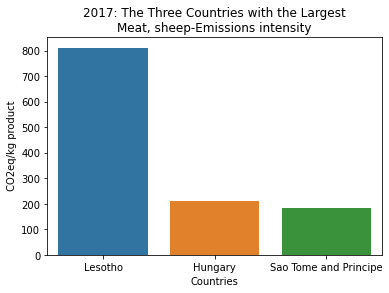

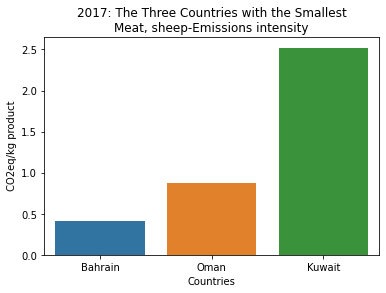

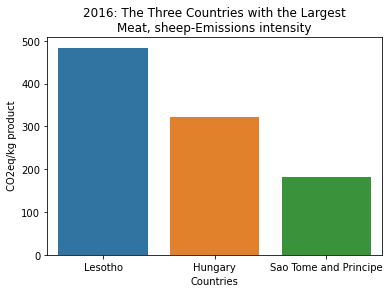

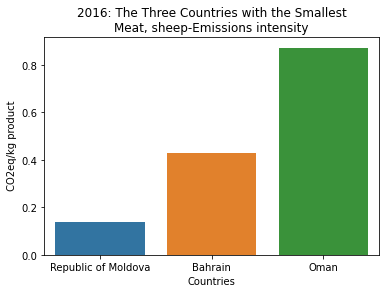

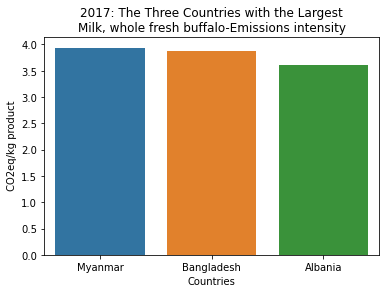

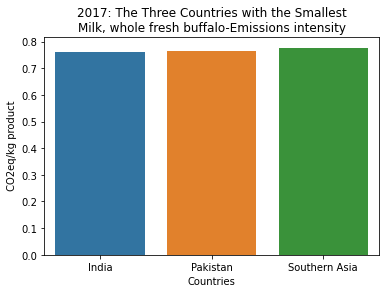

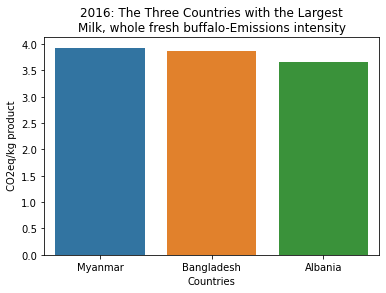

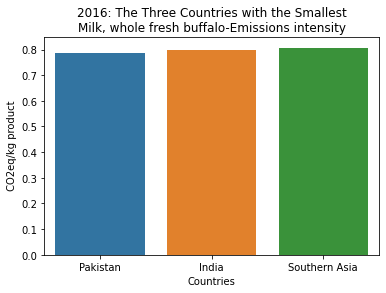

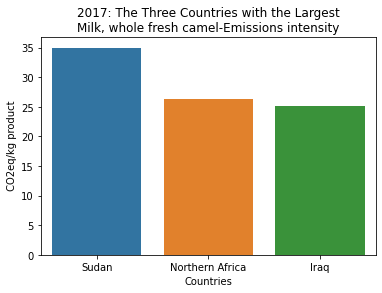

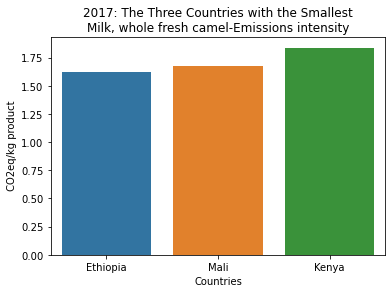

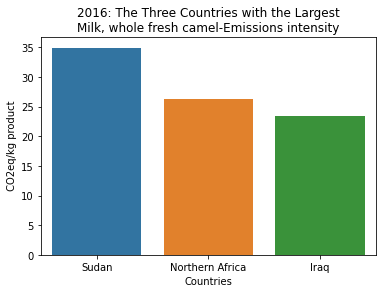

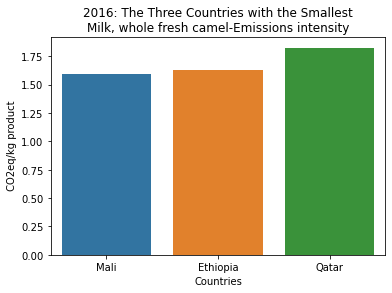

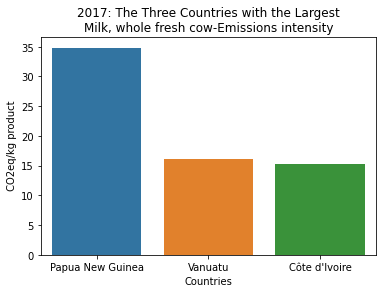

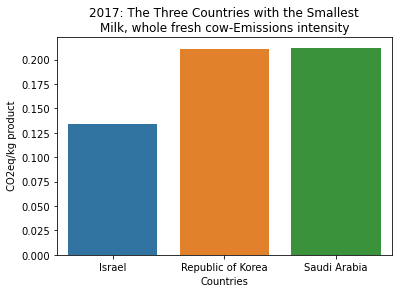

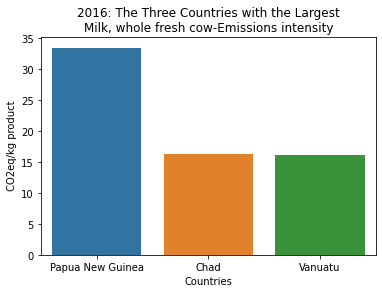

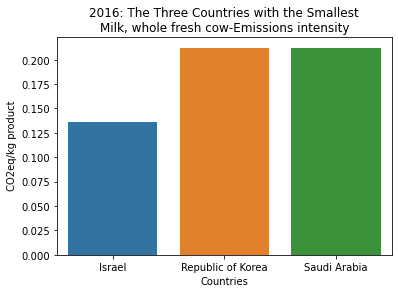

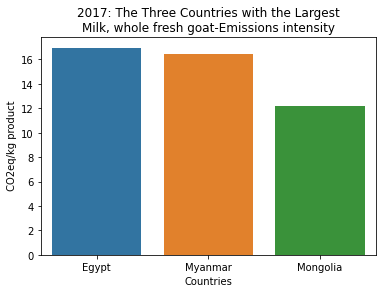

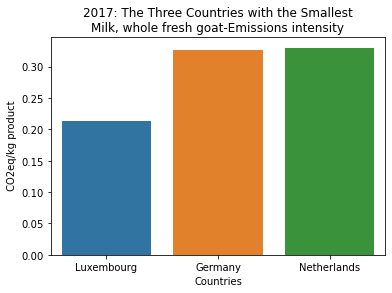

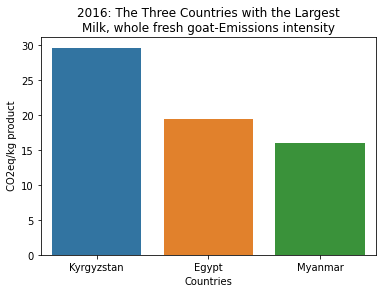

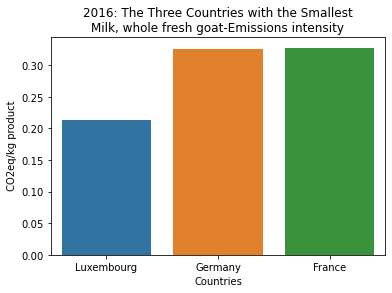

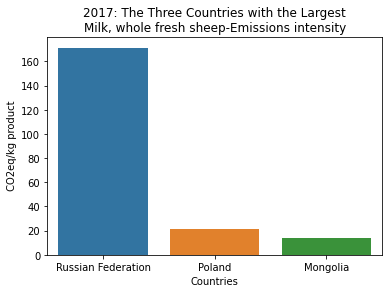

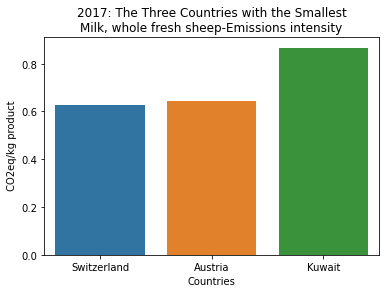

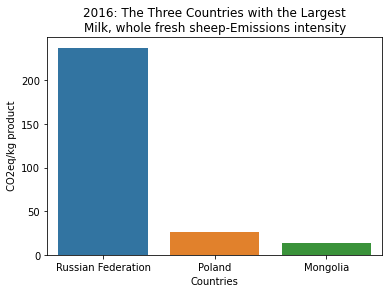

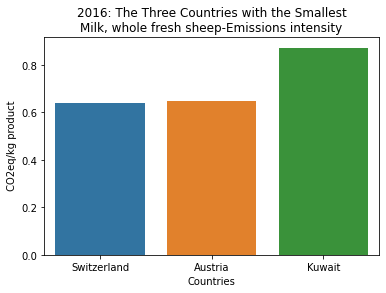

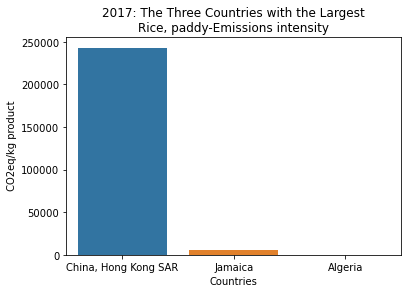

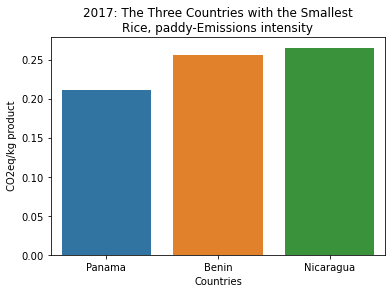

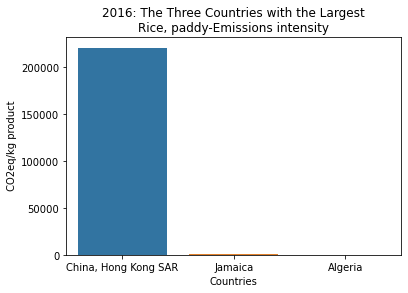

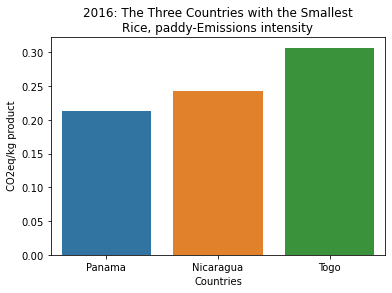

In [24]:
for i in range(0,len(CO2)):
    graphLargest(2017, i)
    graphSmallest(2017, i)
    
    graphLargest(2016, i)
    graphSmallest(2016, i)